In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv', nrows=6729)
# gdp_df = pd.DataFrame(data = gdp_df)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN


In [3]:
gdp_df.shape

(6729, 4)

6731 rows × 4 columns

In [4]:
internet_df = pd.read_csv('..\data\internet_use.csv', nrows=4495)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [5]:
internet_df.shape

(4495, 4)

4495 rows × 4 columns

In [6]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [7]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [8]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6719,Zimbabwe,1999,3054.064189,NaN
6720,Zimbabwe,1998,3099.076182,NaN
6721,Zimbabwe,1997,3036.422224,NaN
6722,Zimbabwe,1996,2985.856605,NaN
6723,Zimbabwe,1995,2736.486436,NaN
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [9]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [10]:
gdp_df.drop('Value Footnotes', 1, inplace=True)
internet_df.drop('Value Footnotes', 1, inplace=True)

In [11]:
gdp_df.rename(columns = {"Country or Area": "Country", "Year":"Year", "Value": "GDP_Per_Capita"}, inplace=True)
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6724,Zimbabwe,1994,2768.309953
6725,Zimbabwe,1993,2572.870395
6726,Zimbabwe,1992,2591.007534
6727,Zimbabwe,1991,2906.272849


In [12]:
internet_df.rename(columns = {"Country or Area": "Country", "Year":"Year", "Value": "Internet_Users_Pct"}, inplace=True)
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [13]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.390000
...,...,...,...,...
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645


In [14]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,6.39


In [15]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7700,Virgin Islands (U.S.),1997,NaN,6.948369
7701,Virgin Islands (U.S.),1996,NaN,4.647186
7702,Virgin Islands (U.S.),1995,NaN,2.801958
7703,Virgin Islands (U.S.),1994,NaN,0.940645
7704,Virgin Islands (U.S.),1990,NaN,0.000000


In [16]:
gdp_and_internet_use.shape

(7705, 4)

In [17]:
# gdp_and_internet_sub = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(gdp_and_internet_use.Country))&
#                                             (gdp_and_internet_use.Year.isin([2004, 2009, 2014]))
#                                            ]
# gdp_and_internet_sub
gdp_and_internet_sub = gdp_and_internet_use[gdp_and_internet_use["Year"].isin([2004, 2009, 2014])]
gdp_and_internet_sub


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.390000
9,Afghanistan,2009,1502.354073,3.550000
14,Afghanistan,2004,1025.208245,0.105809
21,Albania,2014,10700.993216,60.100000
26,Albania,2009,9525.377979,41.200000
...,...,...,...,...
7668,Viet Nam,2009,NaN,26.550000
7673,Viet Nam,2004,NaN,7.642409
7683,Virgin Islands (U.S.),2014,NaN,50.070000
7688,Virgin Islands (U.S.),2009,NaN,27.396510


In [18]:
data_2004 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2004]
data_2009 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2009]
data_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]
data_2004
data_2009
data_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2014,1795.735834,6.39
21,Albania,2014,10700.993216,60.10
50,Algeria,2014,13557.769757,18.09
79,Angola,2014,6813.052106,21.26
108,Antigua and Barbuda,2014,20440.540555,64.00
...,...,...,...,...
7541,Swaziland,2014,NaN,27.10
7562,Syria,2014,NaN,28.09
7605,T.F.Y.R. Macedonia,2014,NaN,68.06
7663,Viet Nam,2014,NaN,48.31


In [19]:
# ax = plt.pyplot.subplots(nrows=1, ncols=3, sharex=False)

# for ax, df, year in zip(
#     axis,
#     [data_2004, data_2009, data_2014],
#     [2004, 2009,2014]
# )

# g = sns.regplot(df['GDP_Per_Capita'], df['Internet_Users,Pct'], ax=ax)
# g

In [20]:
data_2014.loc[data_2014['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16
Name: 2581, dtype: object

Country               Iceland
Year                     2014
GDP_Per_Capita        42774.9
Internet_Users_Pct      98.16

In [21]:
data_2009.loc[data_2009['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 2586, dtype: object

Country               Iceland
Year                     2009
GDP_Per_Capita        41505.1
Internet_Users_Pct         93
Name: 2586, dtype: object

In [22]:
data_2004.loc[data_2004['Internet_Users_Pct'].idxmax()]

Country                Sweden
Year                     2004
GDP_Per_Capita        40177.9
Internet_Users_Pct      83.89
Name: 5852, dtype: object

Country                Sweden
Year                     2004
GDP_Per_Capita        40177.9
Internet_Users_Pct      83.89
Name: 5852, dtype: object

In [23]:
data_2014.loc[data_2014['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6940, dtype: object

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6940, dtype: object

In [24]:
# data_2014.loc[data_2014['Internet_Users_Pct'] > 0].min()
# data_2014[data_2014['Internet_Users_Pct'].gt(0)].min(0)

Country               Afghanistan
Year                         2014
GDP_Per_Capita             768.47
Internet_Users_Pct           0.99
dtype: object

In [25]:
data_2009.loc[data_2009['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6944, dtype: object

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6944, dtype: object

In [26]:
# data_2009.loc[data_2009['Internet_Users_Pct'] > 0].min()
# data_2009[data_2009['Internet_Users_Pct'].gt(0)].min(0)

Country               Afghanistan
Year                         2009
GDP_Per_Capita            721.063
Internet_Users_Pct       0.185252
dtype: object

In [27]:
data_2004.loc[data_2004['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6949, dtype: object

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6949, dtype: object

In [28]:
# data_2004.loc[data_2004['Internet_Users_Pct'] > 0].min(0)

Country               Afghanistan
Year                         2004
GDP_Per_Capita            676.917
Internet_Users_Pct      0.0243374
dtype: object

In [29]:
data_2014.loc[data_2014['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  130439
Internet_Users_Pct                 NaN
Name: 3639, dtype: object

Country: Macao SAR, China
GDP: 130439

In [30]:
data_2014.loc[data_2014['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                         672.682
Internet_Users_Pct                         NaN
Name: 1014, dtype: object

Country: Central African Republic
GDP: 672.682

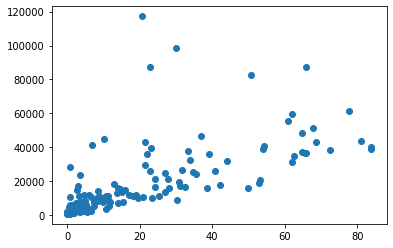

In [31]:
plt.scatter(data_2004.Internet_Users_Pct, data_2004.GDP_Per_Capita)

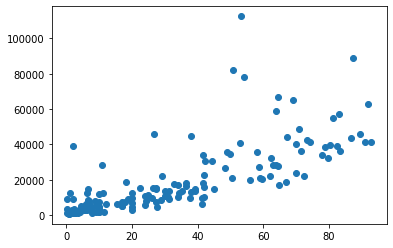

In [32]:
plt.scatter(data_2009.Internet_Users_Pct, data_2009.GDP_Per_Capita)

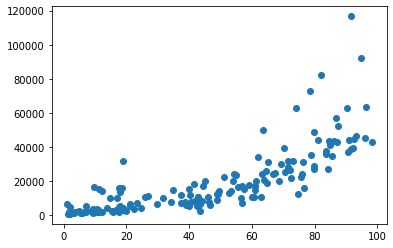

In [33]:
plt.scatter(data_2014.Internet_Users_Pct, data_2014.GDP_Per_Capita)

More countries are getting internet access and are starting to group closer together. Furthermore, with 2004 being a slight exception, the more internet access a country has the higher that countries' GDP tends to be. 

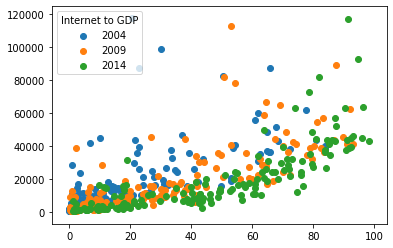

In [34]:
plt.scatter(data_2004.Internet_Users_Pct, data_2004.GDP_Per_Capita, label='2004')
plt.scatter(data_2009.Internet_Users_Pct, data_2009.GDP_Per_Capita, label='2009')
plt.scatter(data_2014.Internet_Users_Pct, data_2014.GDP_Per_Capita, label='2014')
plt.legend(loc='upper left', title='Internet to GDP')
plt.show()

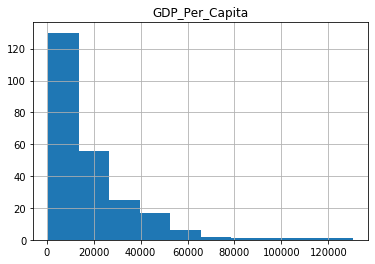

In [35]:
data_2014.hist(column = 'GDP_Per_Capita')
plt.show()

C:\Users\toshi\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\toshi\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


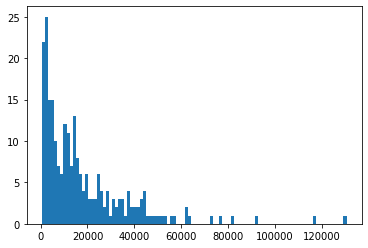

In [36]:
plt.hist(data_2014['GDP_Per_Capita'], 100)
plt.show()

It is not unimodal. Countries still tend to have less GDP, so skewed left.

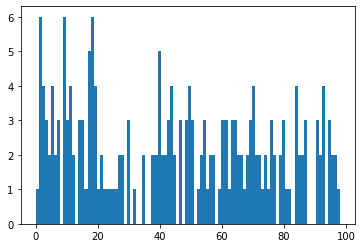

In [37]:
plt.hist(data_2014['Internet_Users_Pct'], 100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163E757ED08>]],
      dtype=object)

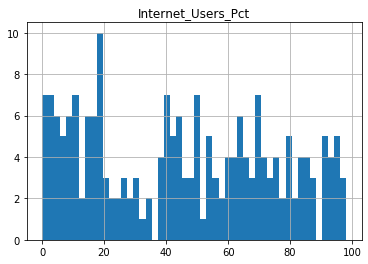

In [38]:
data_2014.hist(column = 'Internet_Users_Pct', bins =50)

It does not appear to be unimodal, more bimodal, although not completely so. 

In [39]:
# top_inter_2014 = data_2014[['Country', 'Year', 'Internet_Users_Pct']].nlargest(5,'Internet_Users_Pct')
# top_inter_2014

In [40]:
# top_inter_2009 = data_2009[['Country', 'Year', 'Internet_Users_Pct']].nlargest(5,'Internet_Users_Pct')
# top_inter_2009

In [41]:
# top_inter_2004 = data_2004[['Country', 'Year', 'Internet_Users_Pct']].nlargest(5,'Internet_Users_Pct') 
# top_inter_2004

In [42]:
data_2014.nlargest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2581,Iceland,2014,42774.888849,98.16
6772,Bermuda,2014,NaN,96.80
4530,Norway,2014,63328.259526,96.30
1404,Denmark,2014,45057.083449,95.99
6732,Andorra,2014,NaN,95.90


Iceland, Bermuda, Norway, Denmark, Andorra

In [43]:
# top_5_internet = pd.concat([top_inter_2014, top_inter_2009, top_inter_2004], ignore_index=True)
# top_5_internet

In [44]:
# top_5_internet.shape

In [45]:
top_country_list = ['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra']
top_5_internet = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(top_country_list)]
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
542,Bermuda,2009,57151.919132,83.250000
547,Bermuda,2004,55452.638880,60.990867
1404,Denmark,2014,45057.083449,95.990000
1409,Denmark,2009,43382.615688,86.840000
1414,Denmark,2004,43670.446201,80.930000
2581,Iceland,2014,42774.888849,98.160000
2586,Iceland,2009,41505.084834,93.000000
2591,Iceland,2004,38893.378798,83.880000
4530,Norway,2014,63328.259526,96.300000
4535,Norway,2009,62617.153609,92.080000


In [46]:
top_5_internet.shape

(15, 4)

In [47]:
# small_inter_2004 = data_2004[['Country', 'Year', 'Internet_Users_Pct']].nsmallest(5,'Internet_Users_Pct') 
# small_inter_2004
# data_2004.loc[data_2004['Internet_Users_Pct'] > 0].min(0) this doesn't work

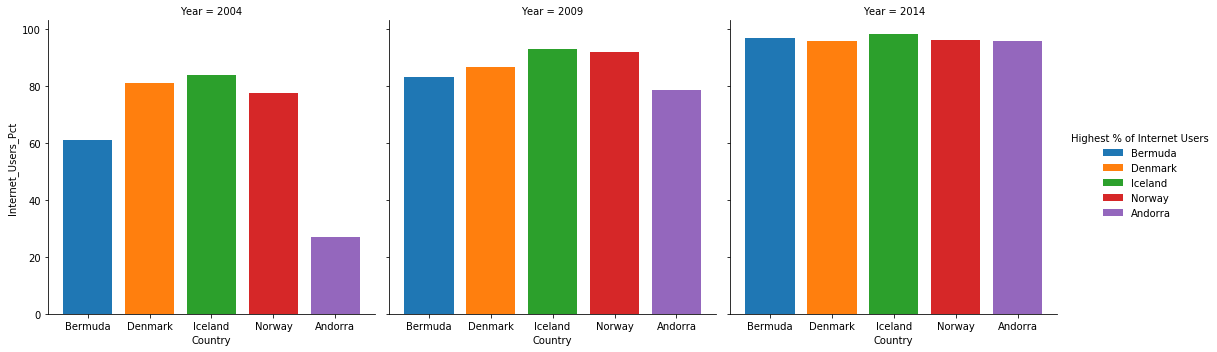

In [48]:
g=sns.FacetGrid(top_5_internet, col='Year', hue="Country", col_wrap=3, height = 5, legend_out=True)
g = g.map(plt.bar, 'Country', 'Internet_Users_Pct',).add_legend(title='Highest % of Internet Users')

In [49]:
# Andorra had the greatest growth from 2004 to 2014

In [50]:
data_2014.nsmallest(5,'Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6940,Dem. People's Rep. of Korea,2014,NaN,0.00
6999,Eritrea,2014,NaN,0.99
6044,Timor-Leste,2014,6466.737732,1.14
794,Burundi,2014,768.469837,1.38
7521,Somalia,2014,NaN,1.63


In [51]:
lowest_country_list = ['Dem. People\'s Rep. of Korea', 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia']
lowest_5_internet = gdp_and_internet_sub[gdp_and_internet_sub.Country.isin(lowest_country_list)]
lowest_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
799,Burundi,2009,721.063140,0.900000
804,Burundi,2004,708.833720,0.349060
1722,Eritrea,2009,1950.533339,0.540000
1727,Eritrea,2004,2317.349879,NaN
6044,Timor-Leste,2014,6466.737732,1.140000
6049,Timor-Leste,2009,9275.529371,0.185252
6054,Timor-Leste,2004,4898.575839,NaN
6940,Dem. People's Rep. of Korea,2014,NaN,0.000000
6944,Dem. People's Rep. of Korea,2009,NaN,0.000000


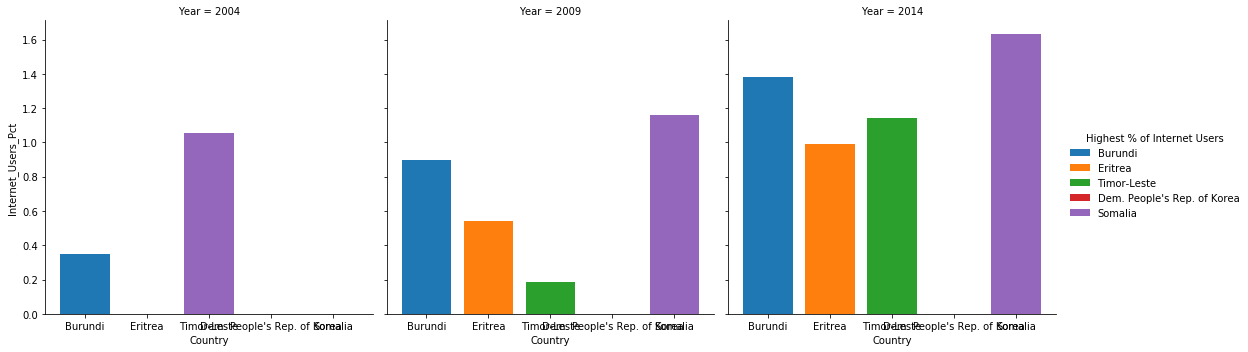

In [64]:
g=sns.FacetGrid(lowest_5_internet, col='Year', hue="Country", col_wrap=3, height = 5, legend_out=True)
g = g.map(plt.bar, 'Country', 'Internet_Users_Pct',).add_legend(title='Highest % of Internet Users')

In [53]:
# People's Republic of North Korea has 0.00 internet

In [54]:
data_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3639,"Macao SAR, China",2014,130439.106674,NaN
5003,Qatar,2014,116693.507701,91.49
3610,Luxembourg,2014,92349.186429,94.67
5316,Singapore,2014,81965.361071,82.00
707,Brunei,2014,76448.593329,NaN


In [55]:
top_gdp_10 = ["Macao SAR, China", "Qatar", "Luxembourg", "Singapore", "Brunei"] 

In [56]:
top_5_gdp = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(top_gdp_10))&
                                  (gdp_and_internet_use.Year.isin([1994, 2004, 2014]))]
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
707,Brunei,2014,76448.593329,NaN
717,Brunei,2004,83963.238066,NaN
727,Brunei,1994,84627.927816,NaN
3610,Luxembourg,2014,92349.186429,94.670000
3620,Luxembourg,2004,87209.819367,65.880000
3630,Luxembourg,1994,65346.199226,0.496486
3639,"Macao SAR, China",2014,130439.106674,NaN
3649,"Macao SAR, China",2004,60791.976853,NaN
3659,"Macao SAR, China",1994,47326.945429,NaN
5003,Qatar,2014,116693.507701,91.490000


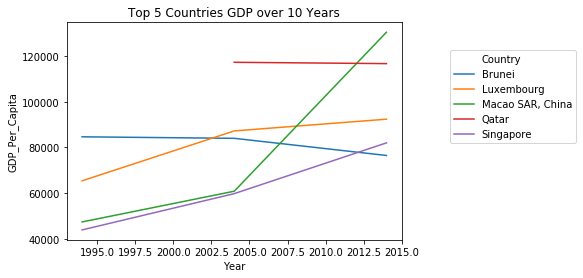

In [57]:
sns.lineplot(x='Year', y='GDP_Per_Capita', hue='Country', data=top_5_gdp)
plt.title('Top 5 Countries GDP over 10 Years')
plt.legend(bbox_to_anchor=(1, .8),
           bbox_transform=plt.gcf().transFigure)

In [58]:
data_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1014,Central African Republic,2014,672.681648,NaN
794,Burundi,2014,768.469837,1.38
1375,Dem. Rep. Congo,2014,784.872656,NaN
4414,Niger,2014,900.136918,1.95
3697,Malawi,2014,1142.530804,5.83


In [59]:
bottom_gdp_10 = ['Central African Republic', "Burundi", "Dem. Rep. Congo", "Niger", "Malawi"]

In [60]:
bottom_5_gdp = gdp_and_internet_use[(gdp_and_internet_use.Country.isin(bottom_gdp_10))&
                                  (gdp_and_internet_use.Year.isin([1994, 2004, 2014]))]
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
794,Burundi,2014,768.469837,1.380000
804,Burundi,2004,708.833720,0.349060
814,Burundi,1994,905.890283,0.000000
1014,Central African Republic,2014,672.681648,NaN
1024,Central African Republic,2004,848.689032,NaN
1034,Central African Republic,1994,861.690971,NaN
1375,Dem. Rep. Congo,2014,784.872656,NaN
1385,Dem. Rep. Congo,2004,577.483297,NaN
1395,Dem. Rep. Congo,1994,812.826913,NaN
3697,Malawi,2014,1142.530804,5.830000


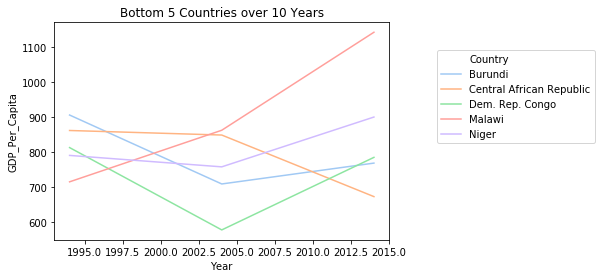

In [61]:
sns.lineplot(x='Year', y='GDP_Per_Capita', hue='Country', palette='pastel', data=bottom_5_gdp)
plt.title('Bottom 5 Countries over 10 Years')
plt.legend(bbox_to_anchor=(1, .8),
           bbox_transform=plt.gcf().transFigure)

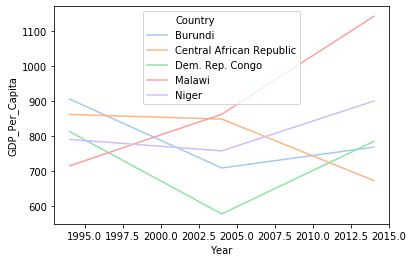

In [62]:
sns.lineplot(x='Year', y='GDP_Per_Capita', hue='Country', palette='pastel', data=bottom_5_gdp)